# EDA for Dynamic Ticket Pricing

**Objective:** To explore the synthetic dataset for the dynamic pricing engine, understand the key drivers of ticket sales, and generate hypotheses for the demand forecasting model.

**Methodology:**
1.  **Setup & Initial Inspection**: Load libraries and data, perform a high-level check.
2.  **Univariate Analysis**: Analyze the distribution of individual features.
3.  **Bivariate Analysis**: Investigate relationships between the target variable (`zone_historical_sales`) and key predictors.
4.  **Time-Series & Segment Analysis**: Explore temporal patterns and differences across segments like `seat_zone` and `opponent_tier`.
5.  **Summary & Next Steps**: Consolidate findings and outline next steps for feature engineering and modeling.

---

## 1. Setup & Initial Inspection

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [67]:
# Load the dataset
df = pd.read_csv('../data/03_synthetic/synthetic_match_data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

print("\nData Types and Non-Null Counts:")
df.info()

Dataset Shape: (3913, 24)

First 5 Rows:


,match_id,days_until_match,seat_zone,zone_historical_sales,ticket_price,ea_opponent_strength,web_visits,weather_forecast,is_weekday,is_international,...,is_holiday,popular_concert_in_city,flights_to_barcelona_index,google_trends_index,internal_search_trends,social_media_sentiment,web_conversion_rate,zone_seats_availability,ticket_availability_pct,competitor_avg_price
0,1,90,VIP,0,129.85,82,6683,Windy,True,False,...,False,False,20,20,783,0.07,0.0,500,1.0,112.711040
1,1,89,VIP,0,129.63,82,6191,Sunny,True,False,...,False,False,20,20,657,0.08,0.0,500,1.0,152.798023
2,1,88,VIP,0,126.12,82,6849,Sunny,True,False,...,False,False,20,20,580,0.09,0.0,500,1.0,101.033292
3,1,87,VIP,0,114.80,82,7266,Sunny,True,False,...,False,False,23,20,844,0.11,0.0,500,1.0,109.779673
4,1,86,VIP,0,125.34,82,7111,Sunny,True,False,...,False,False,23,20,820,0.10,0.0,500,1.0,109.908375



Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   match_id                    3913 non-null   int64  
 1   days_until_match            3913 non-null   int64  
 2   seat_zone                   3913 non-null   object 
 3   zone_historical_sales       3913 non-null   int64  
 4   ticket_price                3913 non-null   float64
 5   ea_opponent_strength        3913 non-null   int64  
 6   web_visits                  3913 non-null   int64  
 7   weather_forecast            3913 non-null   object 
 8   is_weekday                  3913 non-null   bool   
 9   is_international            3913 non-null   bool   
 10  opponent_tier               3913 non-null   object 
 11  top_player_injured          3913 non-null   bool   
 12  league_winner_known         3913 non-null   bool   
 13  

In [68]:
# Get summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,match_id,days_until_match,zone_historical_sales,ticket_price,ea_opponent_strength,web_visits,team_position,flights_to_barcelona_index,google_trends_index,internal_search_trends,social_media_sentiment,web_conversion_rate,zone_seats_availability,ticket_availability_pct,competitor_avg_price
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,5.604651,45.000000,27.079734,94.423884,80.697674,19418.069512,2.651418,43.108868,43.839254,1944.223102,0.297084,0.001266,5305.308970,0.858871,94.527860
std,2.854489,26.271208,39.379950,78.725556,8.842194,17975.732951,1.337532,27.128649,28.308228,1830.614128,0.349817,0.000838,3148.946136,0.200767,79.834849
min,1.000000,0.000000,0.000000,27.820000,65.000000,4005.000000,1.000000,20.000000,20.000000,334.000000,-0.080000,0.000000,0.000000,0.000000,22.647827
25%,3.000000,22.000000,6.000000,42.150000,75.000000,7659.000000,2.000000,21.000000,20.000000,761.000000,0.040000,0.000716,1201.000000,0.843300,41.315172
50%,6.000000,45.000000,13.000000,68.020000,82.000000,12014.000000,2.000000,29.000000,29.000000,1220.000000,0.130000,0.001382,5979.000000,0.933400,66.222029
75%,8.000000,68.000000,32.000000,118.260000,85.000000,24855.000000,4.000000,62.000000,62.000000,2533.000000,0.530000,0.001811,7942.000000,0.978000,118.903824
max,10.000000,90.000000,380.000000,452.710000,95.000000,141452.000000,5.000000,100.000000,100.000000,16159.000000,1.000000,0.004237,9000.000000,1.000000,528.587892


**Initial Observations:**
* The dataset is loaded correctly.
* There are no apparent missing values from the `info()` output.
* Data types seem appropriate for each column (numeric, boolean, object/string).
* The `describe()` output gives a good sense of the range and central tendency of numeric features.

---

## 2. Univariate Analysis
Let's analyze the distribution of our target variable and key features.

### Target Variable: `zone_historical_sales`

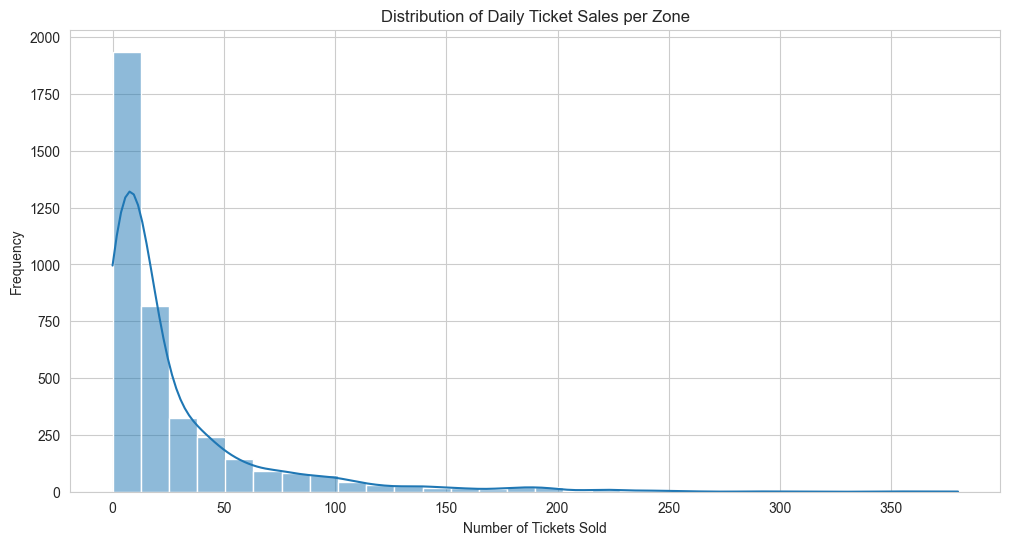

In [69]:
sns.histplot(df['zone_historical_sales'], kde=True, bins=30)
plt.title('Distribution of Daily Ticket Sales per Zone')
plt.xlabel('Number of Tickets Sold')
plt.ylabel('Frequency')
plt.show()

**Observation:** The distribution of sales appears to be right-skewed, with many days having low sales and a long tail of days with high sales. This is typical, as sales often concentrate closer to the match day.

### Categorical & Boolean Features

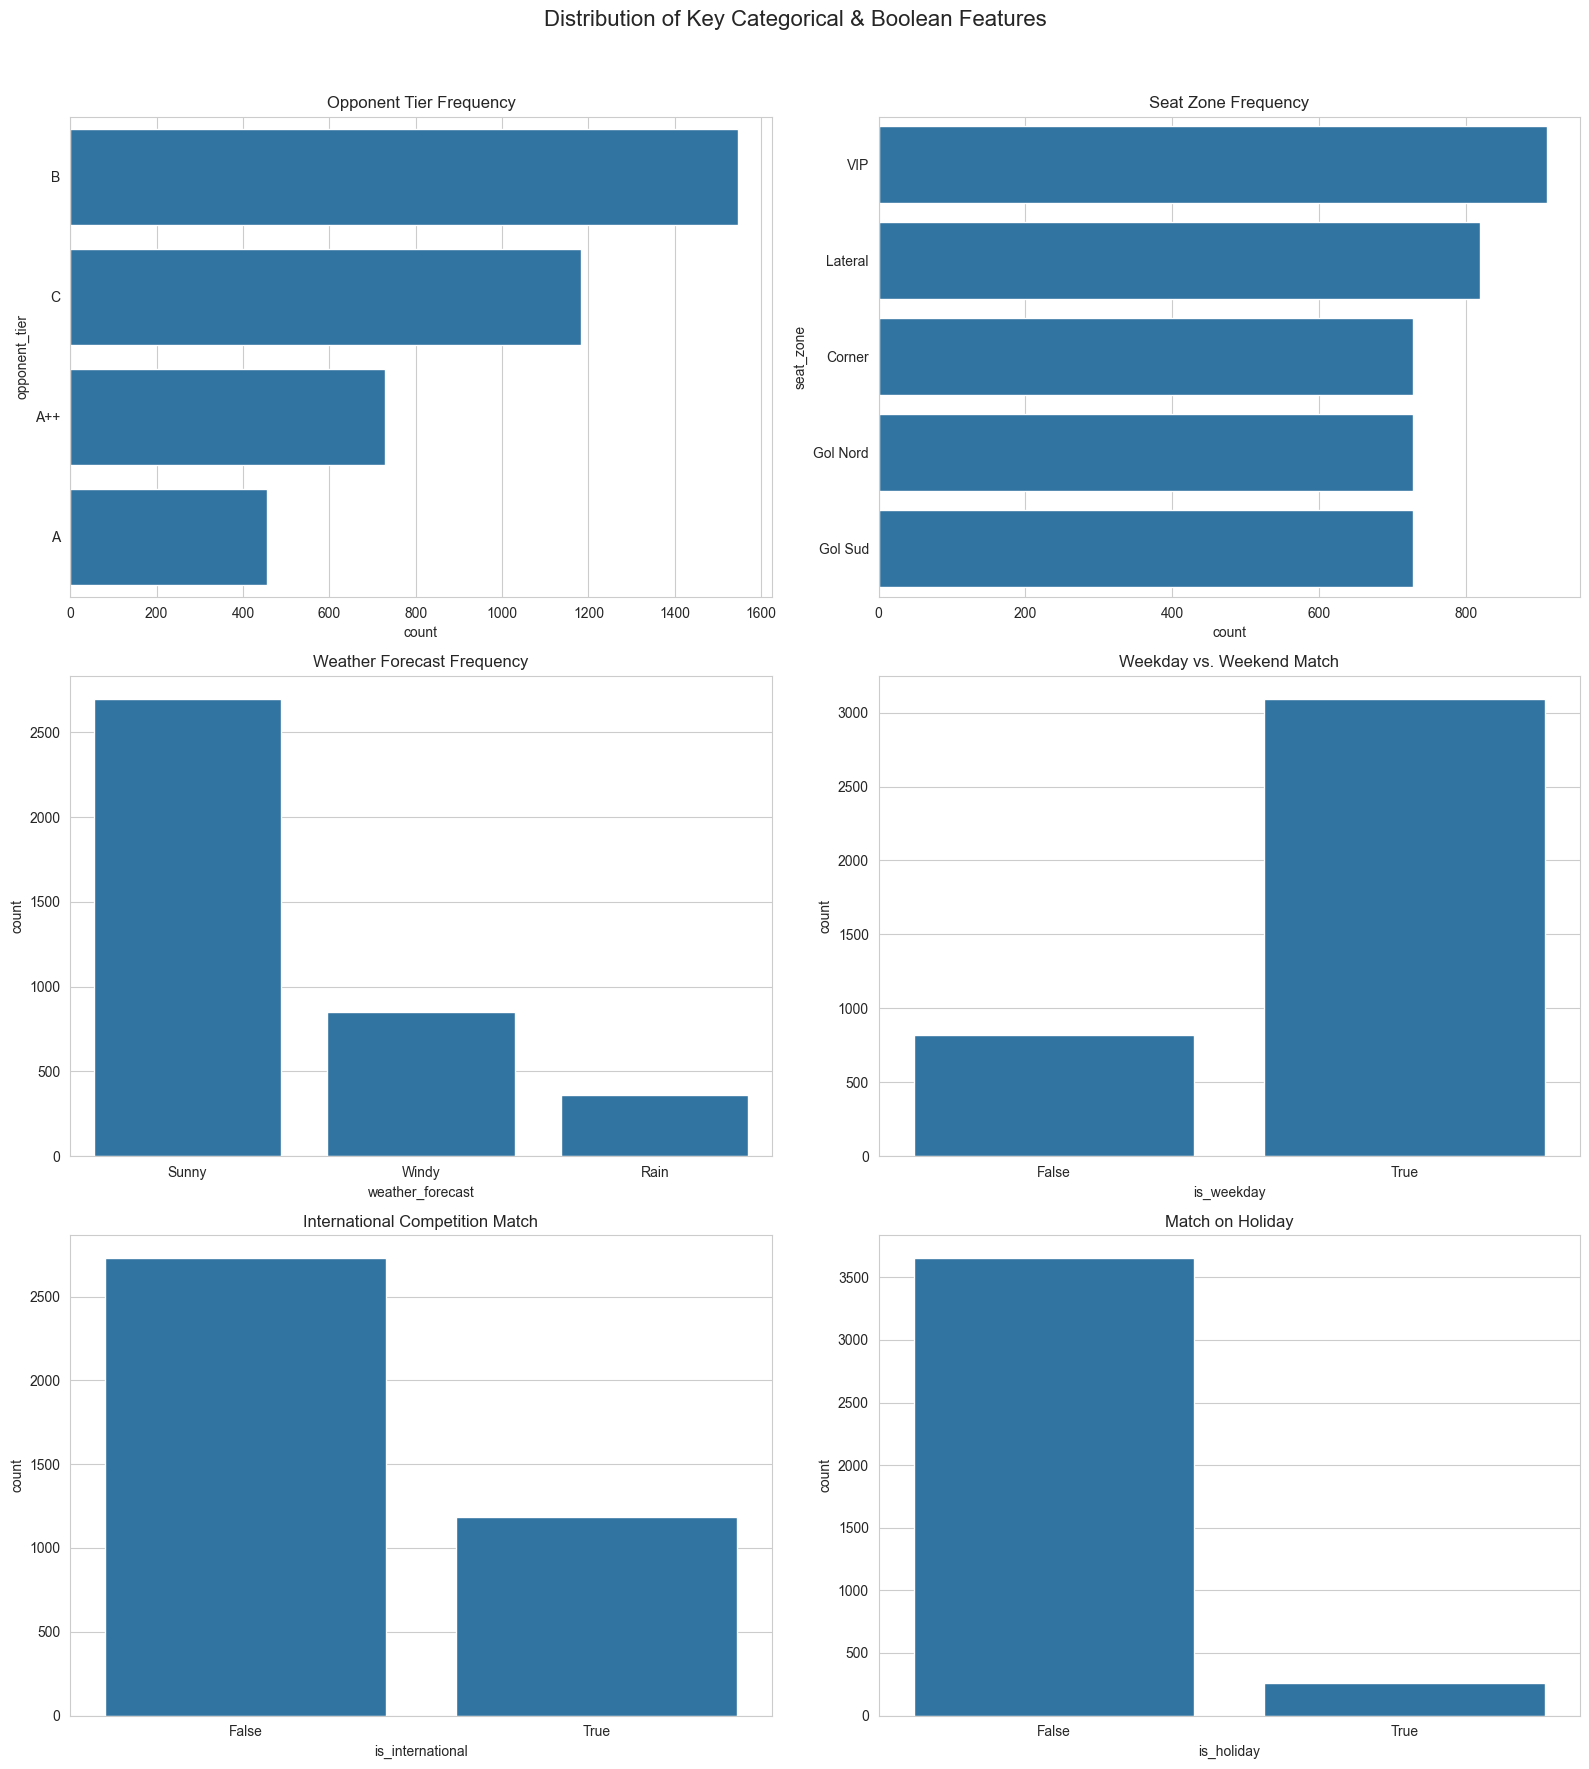

In [70]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Distribution of Key Categorical & Boolean Features', fontsize=16)

sns.countplot(ax=axes[0, 0], data=df, y='opponent_tier', order=df['opponent_tier'].value_counts().index)
axes[0, 0].set_title('Opponent Tier Frequency')

sns.countplot(ax=axes[0, 1], data=df, y='seat_zone', order=df['seat_zone'].value_counts().index)
axes[0, 1].set_title('Seat Zone Frequency')

sns.countplot(ax=axes[1, 0], data=df, x='weather_forecast', order=df['weather_forecast'].value_counts().index)
axes[1, 0].set_title('Weather Forecast Frequency')

sns.countplot(ax=axes[1, 1], data=df, x='is_weekday')
axes[1, 1].set_title('Weekday vs. Weekend Match')

sns.countplot(ax=axes[2, 0], data=df, x='is_international')
axes[2, 0].set_title('International Competition Match')

sns.countplot(ax=axes[2, 1], data=df, x='is_holiday')
axes[2, 1].set_title('Match on Holiday')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observations:**
* The dataset appears balanced across opponent tiers and seat zones.
* Most matches are forecasted to be 'Sunny'.
* There is a good mix of weekday and weekend matches, as well as international and holiday matches, which will be useful for modeling.

---

## 3. Bivariate Analysis
Now we investigate relationships between our target variable and important features.

### Sales vs. Ticket Price

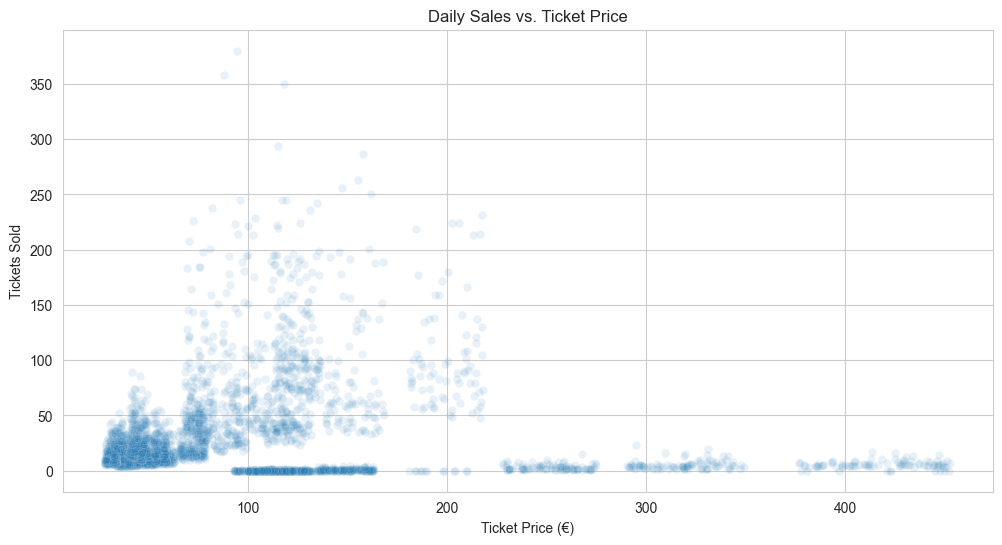

In [71]:
sns.scatterplot(data=df, x='ticket_price', y='zone_historical_sales', alpha=0.1)
plt.title('Daily Sales vs. Ticket Price')
plt.xlabel('Ticket Price (€)')
plt.ylabel('Tickets Sold')
plt.show()

**Observation:** There isn't a simple, clear-cut negative correlation. This is expected. Price is not the only factor; a high price for a high-demand match (e.g., an international competition) can still result in high sales. This confirms the need for a multivariate model.

### Sales vs. Categorical Features

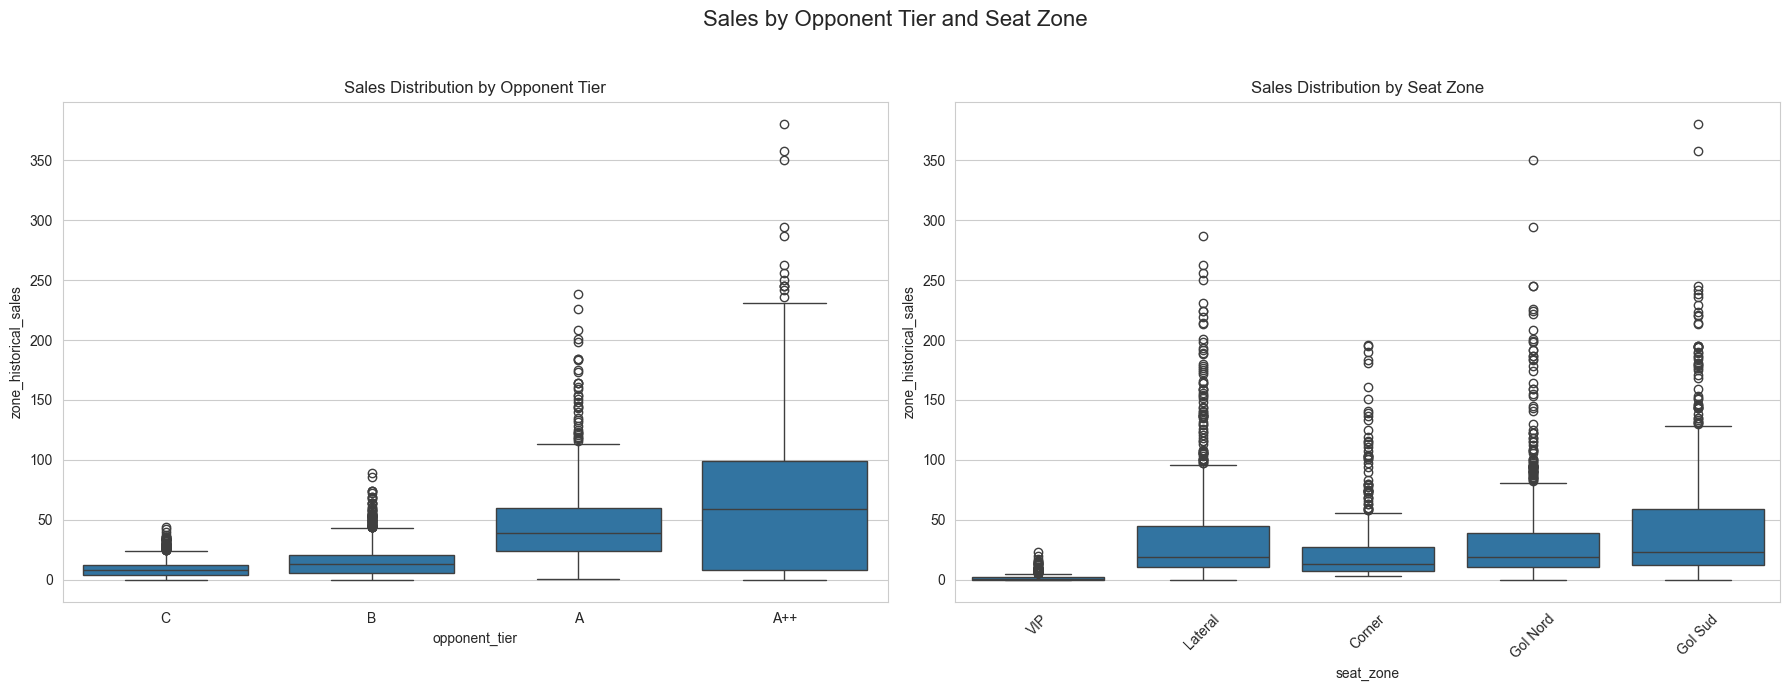

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Sales by Opponent Tier and Seat Zone', fontsize=16)

sns.boxplot(ax=axes[0], data=df, x='opponent_tier', y='zone_historical_sales', order=['C', 'B', 'A', 'A++'])
axes[0].set_title('Sales Distribution by Opponent Tier')

sns.boxplot(ax=axes[1], data=df, x='seat_zone', y='zone_historical_sales')
axes[1].set_title('Sales Distribution by Seat Zone')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Hypotheses Confirmed:**
* **Opponent Tier:** As expected, higher-tier opponents (`A`, `A++`) are associated with significantly higher median sales and greater variance.
* **Seat Zone:** Different zones have distinct sales distributions. `VIP` zones show lower sales volume (due to lower capacity) but potentially at much higher prices. 'Lateral' and 'Gol Nord' appear to be high-volume zones.

### Correlation Analysis

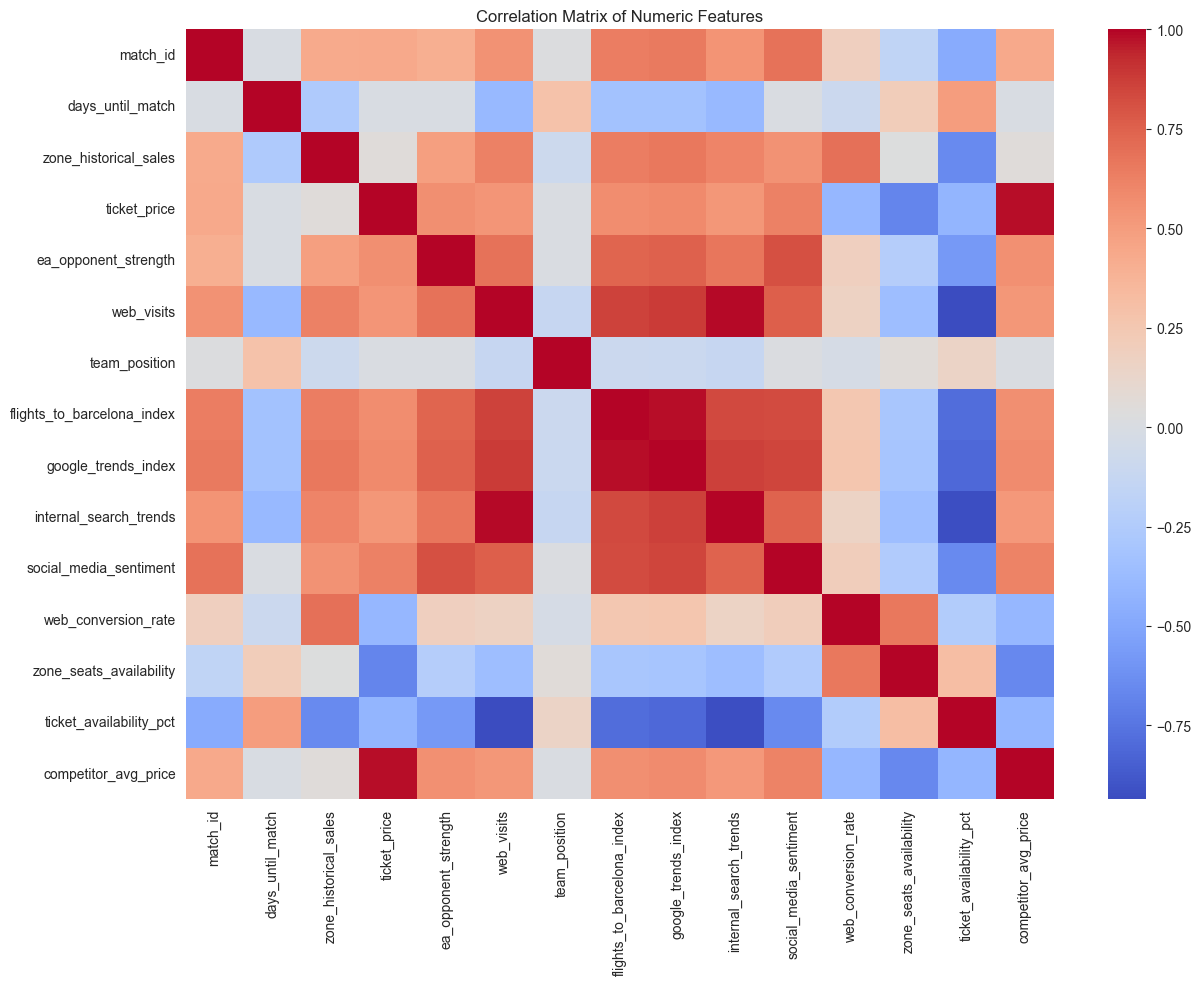

In [73]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm') # annot=True can be cluttered, False is better for overview
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Key Insights from Correlation:**
* **Match Excitement Cluster**: As described in the project documentation, many demand signals like `google_trends_index`, `social_media_sentiment`, `internal_search_trends`, and `web_visits` are highly correlated with each other. This supports the concept of an underlying "Match Excitement Factor".
* **Time Dependency**: `days_until_match` is strongly negatively correlated with sales, which makes sense since sales accumulate over time, and `ticket_availability_pct` decreases.
* **Target Correlation**: `zone_historical_sales` shows a positive correlation with the excitement features (`is_international` included) and a negative one with `days_until_match`.

---

## 4. Time-Series & Segment Analysis

### Sales Evolution Over Time

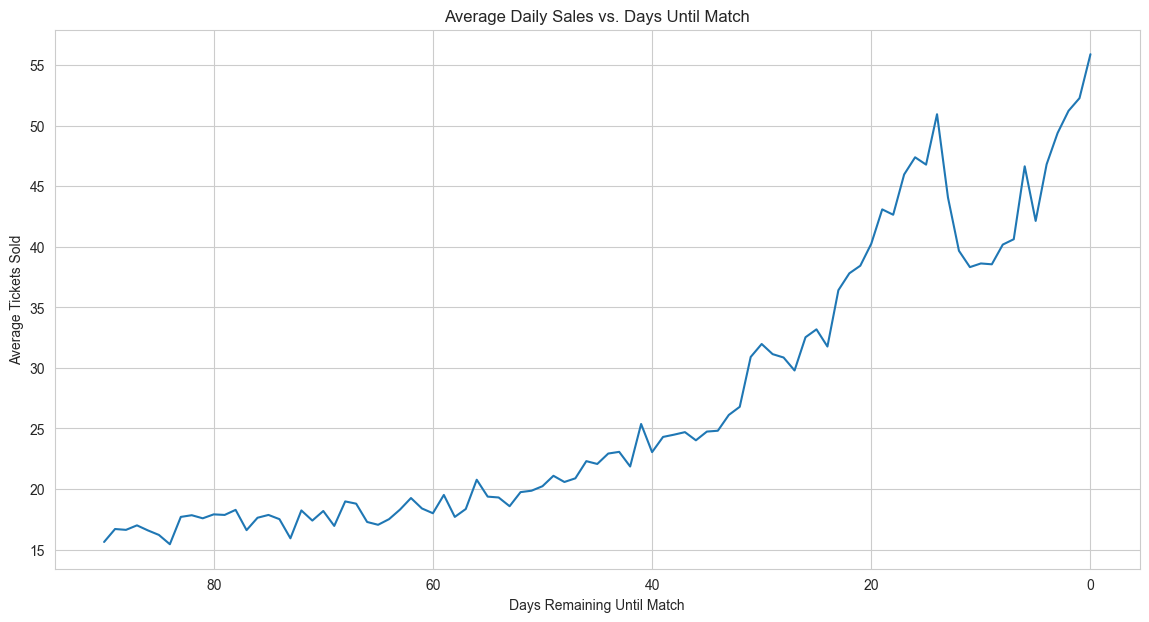

In [74]:
# Plot average sales as a function of days until match
time_sales = df.groupby('days_until_match')['zone_historical_sales'].mean().reset_index()

# Reverse the x-axis to show time progressing towards match day
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_sales, x='days_until_match', y='zone_historical_sales')
plt.title('Average Daily Sales vs. Days Until Match')
plt.xlabel('Days Remaining Until Match')
plt.ylabel('Average Tickets Sold')
plt.gca().invert_xaxis() # To show time from 90 days away to match day
plt.show()

**Observation:** This plot is crucial. It clearly shows that sales volume accelerates significantly as the match date approaches, particularly in the last 2-3 weeks. This confirms the strong time-series component in the data.

### Segmented Time-Series Analysis

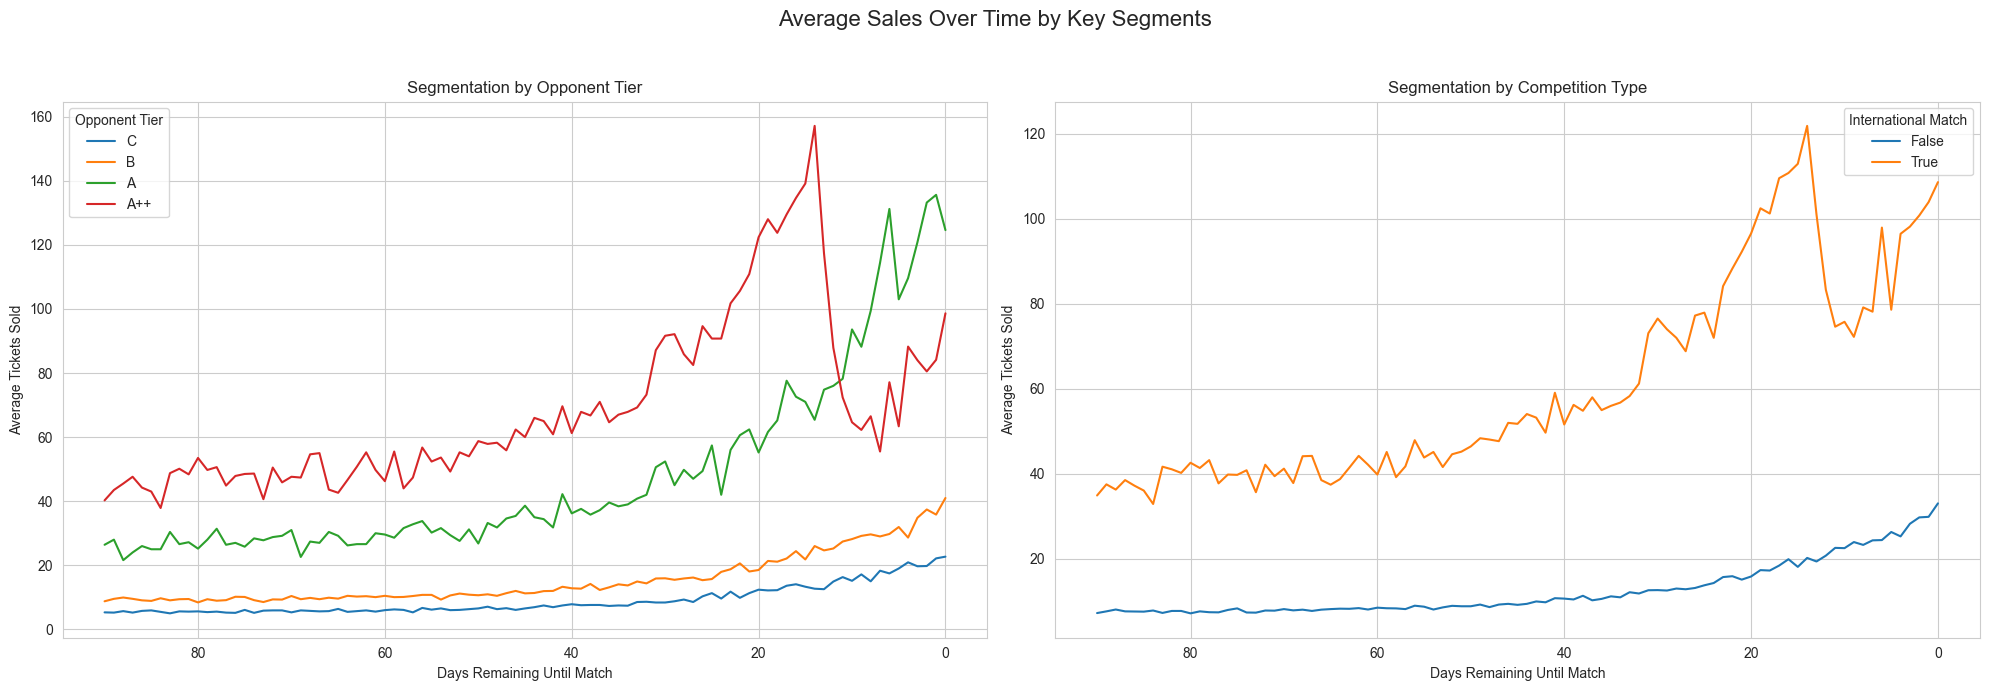

In [75]:
# Plot average sales over time, segmented by opponent tier
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Average Sales Over Time by Key Segments', fontsize=16)

sns.lineplot(ax=axes[0], data=df, x='days_until_match', y='zone_historical_sales', hue='opponent_tier', hue_order=['C', 'B', 'A', 'A++'], errorbar=None)
axes[0].set_title('Segmentation by Opponent Tier')
axes[0].set_xlabel('Days Remaining Until Match')
axes[0].set_ylabel('Average Tickets Sold')
axes[0].invert_xaxis()
axes[0].legend(title='Opponent Tier')

sns.lineplot(ax=axes[1], data=df, x='days_until_match', y='zone_historical_sales', hue='is_international', errorbar=None)
axes[1].set_title('Segmentation by Competition Type')
axes[1].set_xlabel('Days Remaining Until Match')
axes[1].set_ylabel('Average Tickets Sold')
axes[1].invert_xaxis()
axes[1].legend(title='International Match')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation:** The sales curve differs dramatically by segment.
* **Opponent Tier**: `A++` matches not only have a higher sales volume overall, but their sales curve also starts rising earlier and more steeply.
* **International Competition**: The impact of an international match is massive, showing a completely different sales trajectory and volume compared to domestic league games. This is a critical feature.

This suggests a strong interaction between time (`days_until_match`) and context (`opponent_tier`, `is_international`), which a powerful model will need to capture.

---

## 5. Key Findings & Next Steps

### Summary of Insights
1.  **Target Variable**: Daily sales are right-skewed, indicating most sales happen on a few high-demand days.
2.  **Key Drivers**: `opponent_tier`, `is_international`, `seat_zone`, and `days_until_match` are confirmed to be very strong predictors of sales volume.
3.  **Time is Crucial**: There is a clear and powerful time-series pattern where sales accelerate as the match approaches. This effect is not uniform and depends heavily on the match's context (e.g., opponent, competition type).
4.  **Price-Demand is Complex**: The relationship between price and sales is not a simple inverse correlation; it's mediated by demand factors. A high price for a desirable match is acceptable to consumers.
5.  **Feature Redundancy**: The demand-signal features (`google_trends_index`, `web_visits`, etc.) are highly correlated. This is expected and confirms the synthetic data's realism. Tree-based models are fairly robust to this multicollinearity.

### Proposed Next Steps
* **Feature Engineering**:
    * Create interaction features, especially between `days_until_match` and contextual features like `opponent_tier` or `is_international`.
    * Encode categorical variables (`opponent_tier`, `seat_zone`, `weather_forecast`) for modeling.
* **Modeling Strategy**:
    * The EDA strongly supports using a powerful gradient boosting model (like XGBoost or LightGBM) that can handle the complex interactions and non-linear relationships observed.
    * Given the strong time-series component, it will be critical to use a time-based cross-validation strategy (e.g., validating on the last match or last few weeks of data) to get a realistic estimate of model performance.